In [2]:
import pandas as pd 
import numpy as np 
import mesa
import geopandas as gpd 
from geopandas import GeoDataFrame
import os 
import random
import time
import glob
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline 

path = os.getcwd()
rootpath = 'c:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\ABM\\Solar-Adoption-Model-ABM\\'
#rootpath = '/Users/rtseinstein/Documents/GitHub/Solar-Adoption-Agent-based-Model/'
rootpath

'c:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\ABM\\Solar-Adoption-Model-ABM\\'

In [2]:
output = pd.read_csv(rootpath+'experiment/tpbvalues_updating_trial.csv')
output = output.drop(columns='Unnamed: 0')

output['adoption_status'].value_counts()

0    14608
1      392
Name: adoption_status, dtype: int64

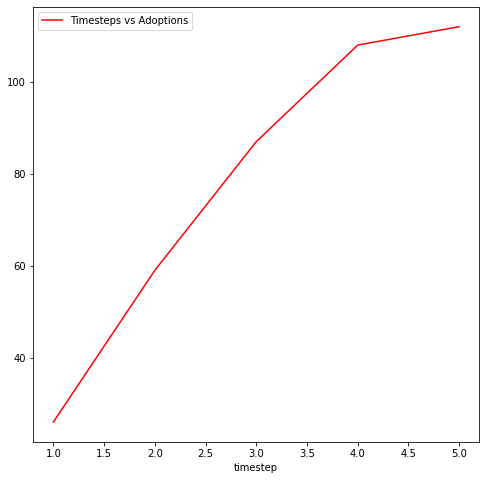

In [3]:
## Adoption Counts
fig,ax = plt.subplots(figsize=(8,8))
output.groupby('timestep')['adoption_status'].value_counts().unstack()[1].plot.line(ax=ax, color='r',label='Timesteps vs Adoptions')

#output.groupby('timestep')['adoption_status'].value_counts().unstack()[1].cumsum().plot.line(ax=ax, color='b',label='Cumulative Adoptions')
#.cumsum()
plt.legend()



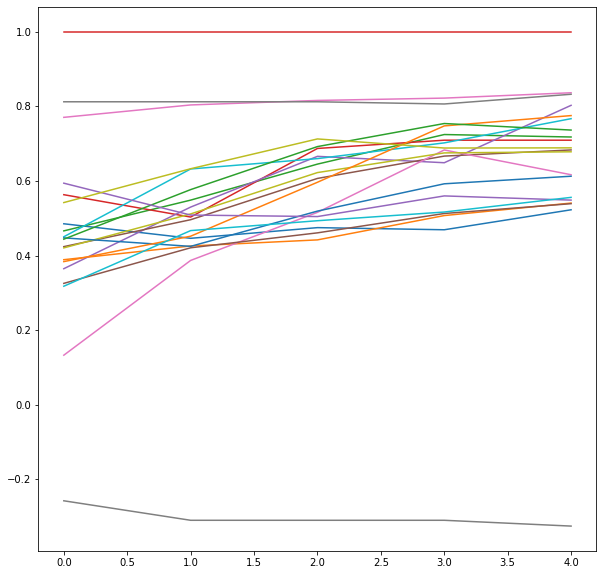

In [28]:
## plotting evolution of attitudes:
import random
fig,ax = plt.subplots(figsize=(10,10))
case_ids = list(output['case_id'].unique())

for i in random.choices(case_ids,k=20):
    plt.plot(list(output.loc[output['case_id']==i,'attitude'].values))
    #output.groupby('timestep')['attitude'].median().plot(color='r',linewidth=3.5,label='Median Attitude')
plt.show()

<AxesSubplot:xlabel='income'>

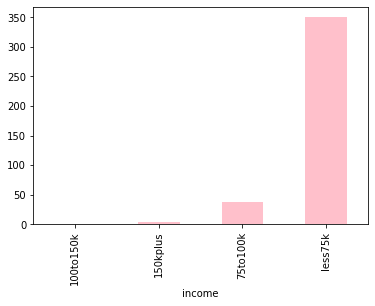

In [24]:
df = pd.read_csv(rootpath+'data/households_subset/subset_initialized_latlonvalues.csv')
df = df.drop(columns='Unnamed: 0') 
df=df.set_index('CASE_ID')
inc_dict = df['income'].to_dict()
age_dict = df['age'].to_dict()

output['income']= output['case_id'].map(inc_dict)
output['age']= output['case_id'].map(age_dict)
#output.groupby('income')['adoption_status'].value_counts()
output.groupby('income')['adoption_status'].value_counts().unstack()[1].plot.bar(color='pink')

<AxesSubplot:xlabel='age'>

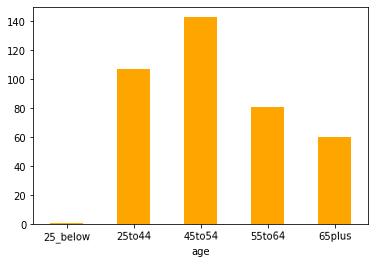

In [25]:
df = pd.read_csv(rootpath+'data/households_subset/subset_initialized_latlonvalues.csv')
df = df.drop(columns='Unnamed: 0') 
df=df.set_index('CASE_ID')
inc_dict = df['income'].to_dict()
age_dict = df['age'].to_dict()

output['income']= output['case_id'].map(inc_dict)
output['age']= output['case_id'].map(age_dict)
#output.groupby('income')['adoption_status'].value_counts()
output.groupby('age')['adoption_status'].value_counts().unstack()[1].plot.bar(rot=1, color='orange')

<AxesSubplot:>

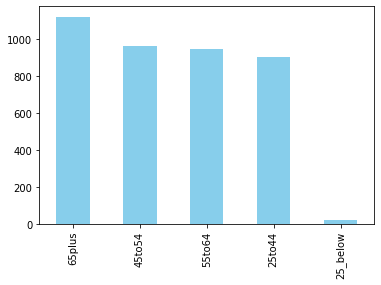

In [115]:
df['age'].value_counts().plot.bar(color='skyblue')

<AxesSubplot:>

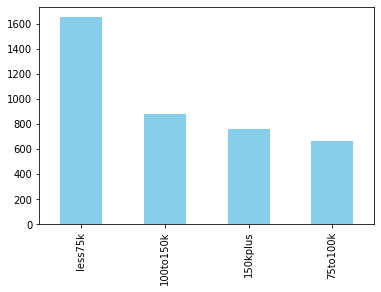

In [116]:
df['income'].value_counts().plot.bar(color='skyblue')

In [123]:
gdf = gpd.read_file(rootpath+'data\\subset_households_5percent.shp')
gdf = gdf.set_index('case_id')

geomap = gdf['geometry'].to_dict()

output['geometry'] = output['case_id'].map(geomap)
outputgdf = GeoDataFrame(output, crs="EPSG:4326", geometry=list(output['geometry']))

outputgdf.to_file(rootpath+'data\\output_gdf.shp')



ipykernel_launcher:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [62]:
output.loc[651].case_id

11595.0

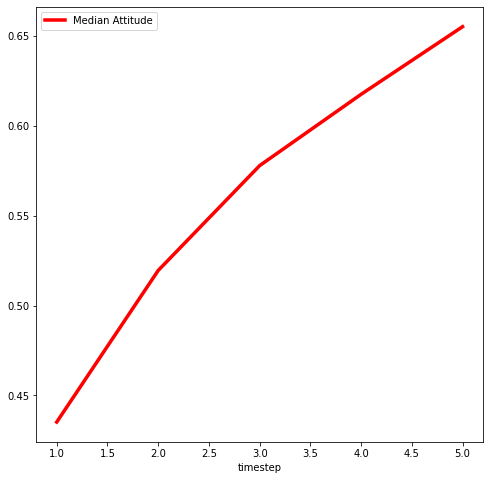

In [15]:
## change in attitudes over time
fig,ax = plt.subplots(figsize=(8,8))

output.groupby('timestep')['attitude'].median().plot(ax=ax, color='r',linewidth=3.5,label='Median Attitude')
#plt.plot(list(output.loc[output['case_id']==49601.0,'attitude'].values), alpha=0.5)
#plt.plot(list(output.loc[output['case_id']==2670.0,'attitude'].values),alpha=0.5)
#plt.plot(list(output.loc[output['case_id']==40932.0,'attitude'].values),alpha=0.5)
#plt.plot(list(output.loc[output['case_id']==21782.0,'attitude'].values),alpha=0.3)
#plt.plot(list(output.loc[output['case_id']==42443.0,'attitude'].values),alpha=0.3)
#plt.plot(list(output.loc[output['case_id']==66397.0,'attitude'].values),alpha=0.3)
#plt.plot(list(output.loc[output['case_id']==11595.0,'attitude'].values),alpha=0.3)

plt.legend()

# Segegrated Network

In [69]:
# create geometry dict for mapping caseids to their actual location
#read in the shapefile of points
hhs = gpd.read_file(rootpath+'data\\households_main\\households_main.shp')
hhs = hhs.set_index('case_id')
geomap = hhs['geometry'].to_dict()
incomemap = hhs['income'].to_dict()

In [4]:
## concatenating all generated inputs into 1 big file
files = glob.glob(rootpath+'\\experiment\\segregated\\*.csv')
sample = pd.read_csv(files[0])

seg=pd.DataFrame(columns=sample.columns)
for f in files:
    seg= pd.concat([seg,pd.read_csv(f)])

seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856384 entries, 0 to 4175
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         object 
 1   timestep           object 
 2   case_id            object 
 3   attitude           float64
 4   subnorms           float64
 5   pbc                float64
 6   adoption_status    object 
 7   geoid              float64
 8   actualpayback      float64
 9   intention          float64
 10  tolerated_payback  float64
dtypes: float64(7), object(4)
memory usage: 261.5+ MB


In [9]:
seg1 = seg[['timestep','case_id','adoption_status']]
seg1['geometry']= seg1['case_id'].map(geomap)

gdf = GeoDataFrame(seg1, crs="EPSG:4326", geometry=seg1['geometry'])

colormap = {1: 'red', 0:'pink'}
gdf['color'] = gdf['adoption_status'].map(colormap)


ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
import plotly.graph_objects as go
from ipywidgets import interact
import plotly.express as px

@interact(x=(1, 36, 1))
def update(x=1):
    #plt.figure(figsize=(8,8))
    gdf.loc[(gdf['timestep']==x) & (gdf['adoption_status']==1)].plot(color='orange')
    plt.axis('off')


interactive(children=(IntSlider(value=1, description='x', max=36, min=1), Output()), _dom_classes=('widget-int…

In [51]:
#seg1.to_csv(rootpath+'experiment\\segregated\\all_households_timeseries.csv')

In [56]:
t1 = seg1.loc[seg1['timestep']==1]
t1.loc[t1['adoption_status']==1]['case_id'].unique()

1518

In [59]:
t2 = seg1.loc[seg1['timestep']==2]
len(t2.loc[t2['adoption_status']==1]['case_id'].unique())

2421

In [63]:
adoption_numbers = []

for i in range(1,8):
    t= seg1.loc[seg1['timestep']==i]
    adoption_numbers.append(len(t.loc[t['adoption_status']==1]['case_id'].unique()))

adoption_numbers

[1518, 2421, 2718, 2865, 2982, 3035, 3073]

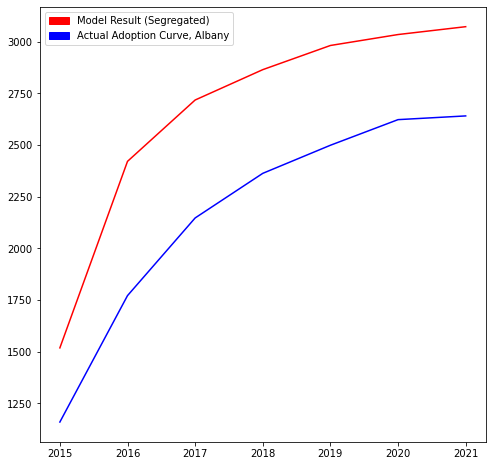

In [65]:
import matplotlib.patches as mpatches

x = [2015,2016,2017,2018,2019,2020,2021]
modelresult = adoption_numbers
actual = [1159,1771,2147,2363,2499,2623,2641]

fig,ax = plt.subplots(figsize=(8,8))
plt.plot(x,modelresult,color='red')
plt.plot(x,actual,color='blue')


r = mpatches.Patch(color='red', label='Model Result (Segregated)')
b = mpatches.Patch(color='blue', label='Actual Adoption Curve, Albany')
plt.legend(handles=[r,b])


In [76]:
incomegroups={'less75k':[],'75to100k':[],'100to150k':[],'150kplus':[]}

for i in range(1,8): #timesteps
    t= seg.loc[seg['timestep']==i]
    t= t.loc[t['adoption_status']==1]
    t['income']= t['case_id'].map(incomemap)

    a = t.groupby('income')['case_id'].count().to_dict()
    for k in a.keys():
        incomegroups[k].append(a[k])
    
incomegroups


{'less75k': [1173, 1761, 1986, 2080, 2149, 2172, 2189],
 '75to100k': [306, 510, 514, 516, 518, 518, 519],
 '100to150k': [12, 51, 68, 78, 98, 113, 116],
 '150kplus': [27, 99, 150, 191, 217, 232, 249]}

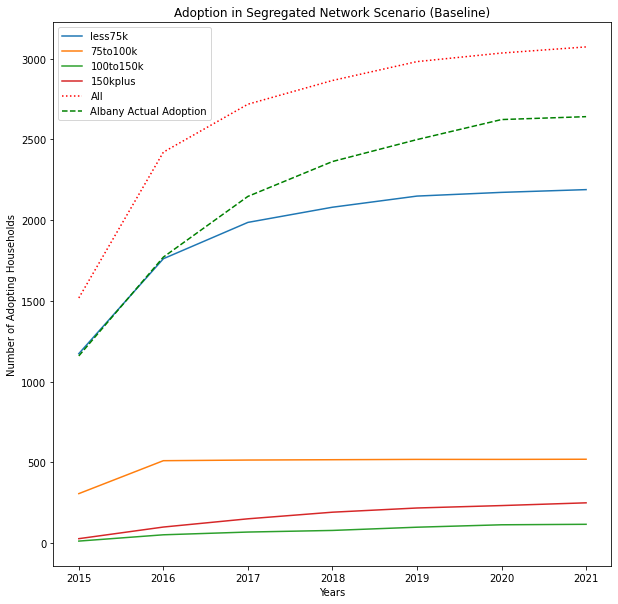

In [86]:
#plotting
fig,ax = plt.subplots(figsize=(10,10))
timesteps= [2015,2016,2017,2018,2019,2020,2021]
for income in incomegroups.keys():
    plt.plot(timesteps,incomegroups[income],label=income)
plt.plot(timesteps,modelresult,label='All',color='red',linestyle='dotted')
plt.plot(timesteps,actual,label='Albany Actual Adoption',color='green',linestyle='dashed')
plt.title('Adoption in Segregated Network Scenario (Baseline)')
plt.xlabel('Years')
plt.ylabel('Number of Adopting Households')
plt.legend()

ipykernel_launcher:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='income'>

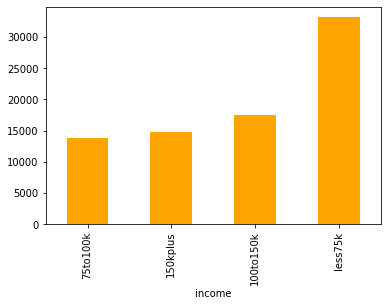

In [94]:
t= seg.loc[seg['timestep']==1]
t['income']=t['case_id'].map(incomemap)
t.groupby('income')['case_id'].count().sort_values().plot.bar(color='orange')